<a href="https://colab.research.google.com/github/ASWATHI-PK18/McD-CODE-CONVERSION/blob/main/mcd_code_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Replication of McDonalds Case Study in Python 

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
The dataset has 1453 rows and 15 columns.


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.00000

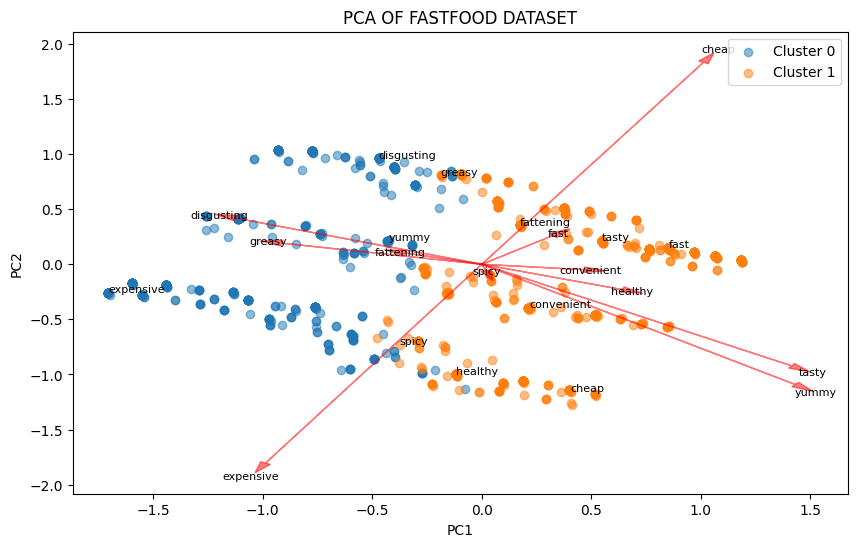



Extracting Segments




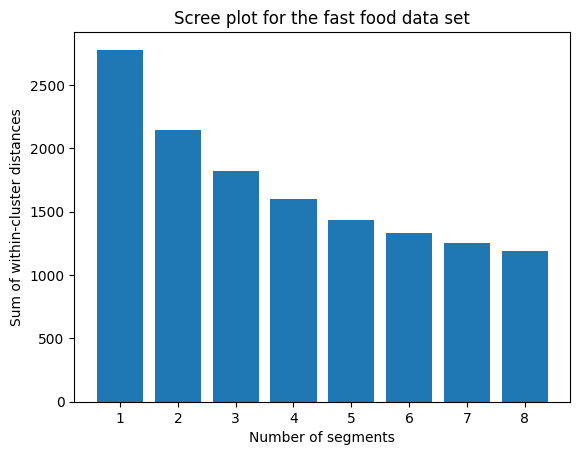



Global stability of k-means segmentation solutions for the fast food data set



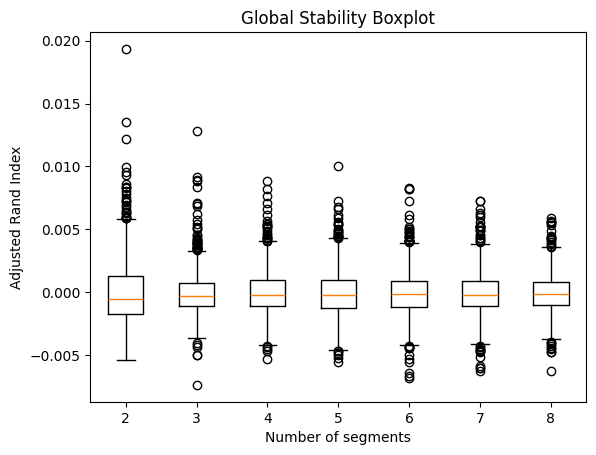

In [129]:


print("Replication of McDonalds Case Study in Python \n")
!pip install scikit-learn
!pip install bioinfokit
!pip install tabulate

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from bioinfokit.visuz import cluster
from sklearn.utils import resample # Import resample for bootstrapping
from tabulate import tabulate
import seaborn as sns
from sklearn.mixture import GaussianMixture

from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from scipy.stats import t


mcdonalds = pd.read_csv('/content/sample_data/mcdonalds.csv')

column_names = mcdonalds.columns
print(column_names)
dimensions = mcdonalds.shape
print(f"The dataset has {dimensions[0]} rows and {dimensions[1]} columns.")
print('\n')
print(mcdonalds.head(3))
print(mcdonalds.describe())
MD_x = mcdonalds.iloc[:,0:11]


MD_x = (MD_x == "Yes").astype(int)
column_means = MD_x.mean(axis=0)
rounded_means = column_means.round(2)
print(rounded_means)
pca = PCA()

MD_pca = pca.fit(MD_x)
explained_variance_ratio = pca.explained_variance_ratio_  # Proportion of variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)  # Cumulative variance
print('\n')
print("\nProportion of Variance Explained:")
print(tabulate(pd.DataFrame(PCA().fit(MD_x).explained_variance_ratio_, columns=["Explained Variance"])))

print("\nSummary of PCA Results:")
print(tabulate(pd.DataFrame(pca.components_, columns=MD_x.columns).describe()))

#PCA SUMMERY
#MD_pca = PCA().fit_transform(MD)

print("Explained Variance Ratio (Individual):\n")
print(np.round(explained_variance_ratio, 2))
print('\n')
print("\nCumulative Variance Explained:")
print(np.round(cumulative_variance, 2))
#MD_pca = PCA().fit_transform(MD)
print('\n')
print("Explained Variance Ratio (Individual):")
print(np.round(explained_variance_ratio, 2))
print('\n')
print("\nCumulative Variance Explained:")
print(np.round(cumulative_variance, 2))


MD_pca = PCA().fit_transform(MD_x)

rounded_pca_results = pd.DataFrame(np.round(MD_pca, 1), columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])
df_pca_results = pd.DataFrame(rounded_pca_results, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])

print(df_pca_results)
print('\n')



kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(StandardScaler().fit_transform(MD_x))

df_plot = pd.DataFrame(MD_pca, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])
df_plot['Cluster'] = cluster_labels

print('Principal components analysis of the fast food data set')
plt.figure(figsize=(10, 6))
for cluster in df_plot['Cluster'].unique():
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5)


for i, col_name in enumerate(MD_x.columns):
    plt.annotate(col_name, (MD_pca[i, 0], MD_pca[i, 1]), fontsize=8)

# Plot loadings as arrows
loadings = pca.components_
pca_scores = MD_pca

for i, col_name in enumerate(MD_x.columns):
    plt.arrow(0, 0, loadings[0, i]*3, loadings[1, i]*3, color='r', alpha=0.5, head_width=0.05, head_length=0.1)  # Adjust scaling as needed
    plt.text(loadings[0, i]*3.2, loadings[1, i]*3.2, col_name, color='black', ha='center', va='center', fontsize=8) # Adjust scaling as needed
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA OF FASTFOOD DATASET')


plt.legend()
plt.show()
# Get PCA loadings (components)
loadings = pca.components_
pca_scores = MD_pca
print('\n')

print('Extracting Segments\n\n')

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_x_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_x_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree plot for the fast food data set")
plt.show()
print('\n')

print('Global stability of k-means segmentation solutions for the fast food data set\n')
def boot_cluster(data, k_range, nrep, nboot):

    results = {k: [] for k in k_range}
    for k in k_range:
        for _ in range(nrep):
            # Cluster original data
            kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000)).fit(data)
            labels_original = kmeans.labels_

            for _ in range(nboot):
                # Bootstrap sample
                data_bootstrap = resample(data)
                kmeans_boot = KMeans(n_clusters=k, random_state=np.random.randint(10000)).fit(data_bootstrap)
                labels_bootstrap = kmeans_boot.labels_

                # Compute ARI between original and bootstrap clusters
                ari = adjusted_rand_score(labels_original, labels_bootstrap)
                results[k].append(ari)
    return results
k_range = range(2, 9)
results = boot_cluster(MD_x, k_range, nrep=10, nboot=100)

plt.boxplot([results[k] for k in k_range], labels=k_range)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.show()





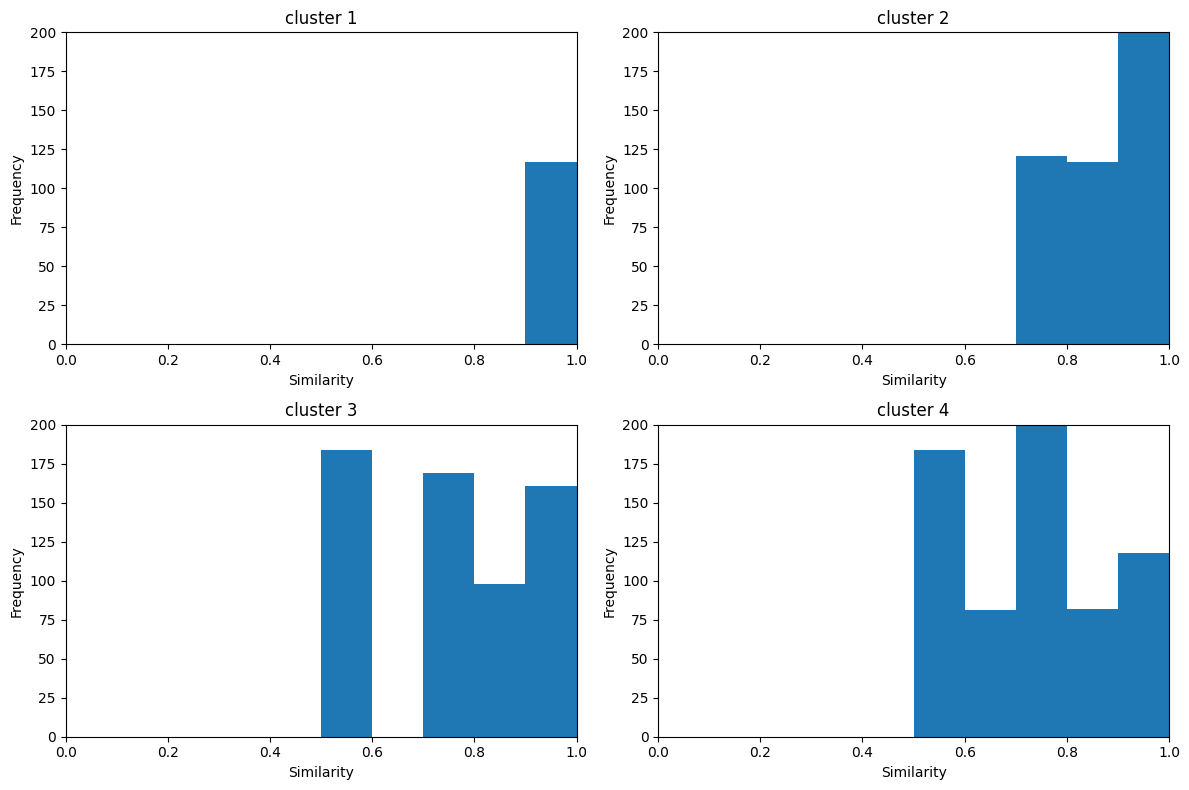

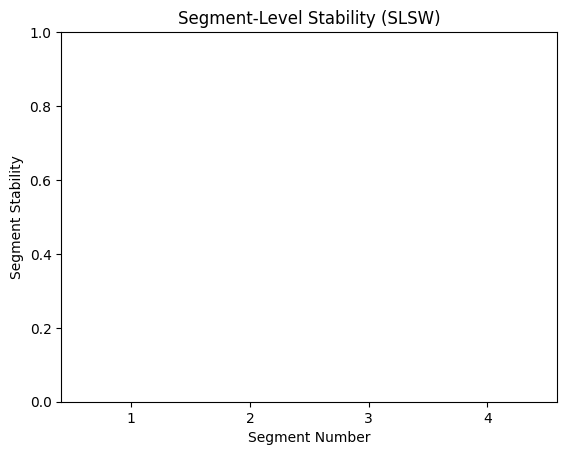

In [101]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_x_km28[str(i)].predict(MD_x)
    similarities = MD_x_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
MD_k4_labels = kmeans.labels_

# Define a function to calculate segment-level stability (SLSW)
def calculate_slsw(data, labels, nboot=100):
    segment_stabilities = []
    for segment in np.unique(labels):
        ari_values = []
        segment_data = data[labels == segment]  # Filter data for this segment
        for _ in range(nboot):
            # Bootstrap sample the segment data
            boot_data = resample(segment_data)
            # Cluster the bootstrap sample
            boot_kmeans = KMeans(n_clusters=4, random_state=np.random.randint(10000)).fit(boot_data)
            # Compute ARI for the segment
            boot_labels = boot_kmeans.predict(segment_data) # Predict on original segment data
            ari = adjusted_rand_score(labels[labels == segment], boot_labels) # Compare with the original segment labels
            ari_values.append(ari)
        # Average ARI for the segment
        segment_stabilities.append(np.mean(ari_values))
    return segment_stabilities

# Compute segment-level stability
slsw_results = calculate_slsw(MD_x, MD_k4_labels, nboot=100)

# Plot segment-level stability
df_plot_cluster_4 = pd.DataFrame({"Segment Number": range(1, len(slsw_results) + 1), "Segment Stability": slsw_results})

plt.bar(range(1, len(slsw_results) + 1), slsw_results)

plt.xticks(range(1, len(slsw_results) + 1))

plt.ylim(0, 1)

plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment-Level Stability (SLSW)")
plt.show()

In [93]:
#Using Mixtures of Distributions



In [107]:
# Define a function to run LCA (LDA-like) for different segment sizes



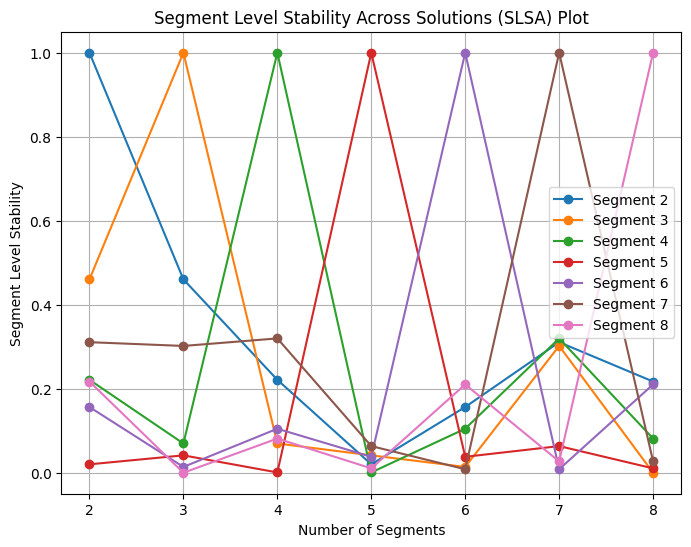

In [108]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_x_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

k mean model and latent class model

In [121]:
# Step 1: Perform K-Means clustering with 4 clusters (k = 4)
!pip install patsy
from patsy import dmatrix  # Import dmatrix from patsy
from sklearn.decomposition import LatentDirichletAllocation # Import LatentDirichletAllocation
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
kmeans_clusters = kmeans.labels_

# Step 2: Fit a Latent Class Analysis model (LDA) using k-means clusters
lda = LatentDirichletAllocation(n_components=4, random_state=1234, max_iter=50)
lda.fit(MD_x)
lda_clusters = np.argmax(lda.transform(MD_x), axis=1)

# Step 3: Create a contingency table to compare cluster assignments
contingency_table = pd.crosstab(kmeans_clusters, lda_clusters, rownames=["k-means"], colnames=["mixture"])

# Print the contingency table
print("Contingency Table (K-Means vs. Mixture Model):")
print(contingency_table)

# Step 1: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
kmeans_clusters = kmeans.labels_

# Compute pseudo log-likelihood for K-Means
def kmeans_log_likelihood(data, kmeans_model):
    cluster_centers = kmeans_model.cluster_centers_
    labels = kmeans_model.labels_
    distances = np.linalg.norm(data - cluster_centers[labels], axis=1)**2
    return -np.sum(distances)

kmeans_loglik = kmeans_log_likelihood(MD_x.to_numpy(), kmeans)
print(f"K-Means Pseudo Log-Likelihood: {kmeans_loglik:.3f}")

# Step 2: Latent Class Model (LDA)
lda = LatentDirichletAllocation(n_components=4, random_state=1234, max_iter=50)
lda.fit(MD_x)

# Log-likelihood from the LDA model
lda_loglik = lda.score(MD_x) * MD_x.shape[0]  # sklearn gives mean log-likelihood per sample
print(f"Latent Class (Mixture Model) Log-Likelihood: {lda_loglik:.3f}")

Contingency Table (K-Means vs. Mixture Model):
mixture    0    1    2    3
k-means                    
0          0  571    7    2
1        207    0    3   18
2         13   47  262    0
3          0   11    0  312
K-Means Pseudo Log-Likelihood: -1603.914
Latent Class (Mixture Model) Log-Likelihood: -31028196.072


Using mixture of regression model

In [120]:
like_counts = mcdonalds['Like'].value_counts()
reversed_like_counts = like_counts.iloc[::-1]

# Display the reversed table
print(reversed_like_counts)

# Example: Simulating the 'Like' column as categorical values
mcdonalds = pd.DataFrame({
    'Like': ['Love it', 'Like it', 'Neutral', 'Dislike it', 'Hate it']
})

like_counts = mcdonalds['Like'].value_counts()
reversed_like_counts = like_counts.iloc[::-1]

# Step 1: Assign numerical values to 'Like' categories
like_mapping = {
    'Love it': 1,
    'Like it': 2,
    'Neutral': 3,
    'Dislike it': 4,
    'Hate it': 5
}
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].map(like_mapping)

# Step 2: Generate a frequency table for 'Like.n'
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()

# Print the frequency table
print(like_n_counts)

like_mapping = {'Love it': 1, 'Like it': 2, 'Neutral': 3, 'Dislike it': 4, 'Hate it': 5}
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)  # Assuming you have like_mapping defined




Like
Hate it       1
Dislike it    1
Neutral       1
Like it       1
Love it       1
Name: count, dtype: int64
Like.n
1    1
2    1
3    1
4    1
5    1
Name: count, dtype: int64


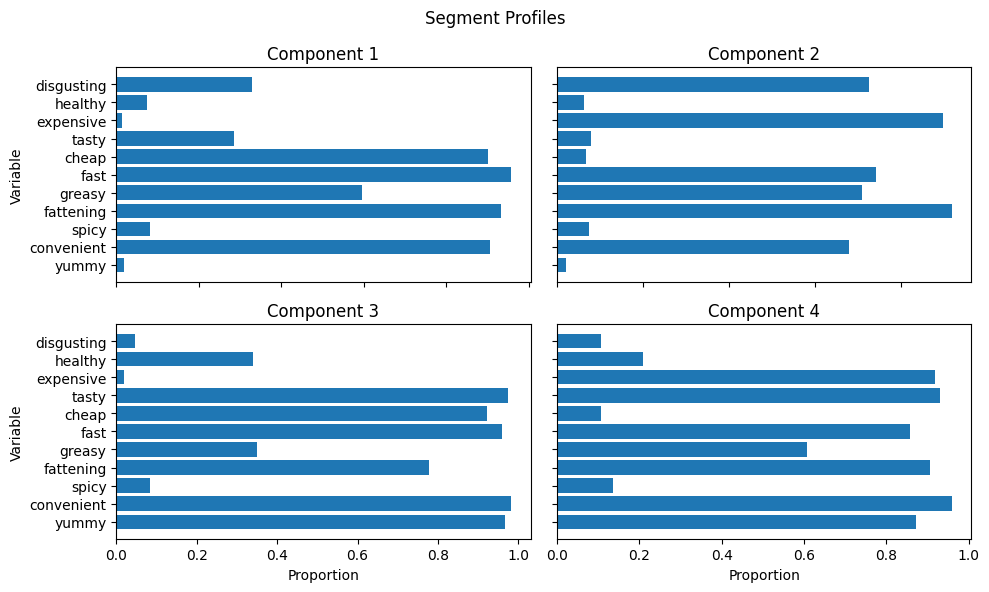

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_x_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

In [126]:

from sklearn.linear_model import LinearRegression

refitted_models = {}
refitted_summaries = []
# Assuming 'original_mcdonalds' is your original DataFrame:
original_mcdonalds = pd.read_csv('/content/sample_data/mcdonalds.csv')
like_mapping = {'Love it': 1, 'Like it': 2, 'Neutral': 3, 'Dislike it': 4, 'Hate it': 5}
original_mcdonalds['Like.n'] = original_mcdonalds['Like'].map(like_mapping)
original_mcdonalds = (original_mcdonalds == "Yes").astype(int)

# Using df_plot instead of mcdonalds to get unique cluster values
for cluster in df_plot['Cluster'].unique():
    # Subset data for the current cluster using the original mcdonalds data
    cluster_data = original_mcdonalds[df_plot['Cluster'] == cluster]
    X_cluster = cluster_data[original_mcdonalds.columns[0:11]]
    # Fit regression model
    model = LinearRegression().fit(X_cluster, y_cluster)
    coefficients = model.coef_
    intercept = model.intercept_
    predictions = model.predict(X_cluster)
    mse = ((y_cluster - predictions) ** 2).mean()

    # Store the model and summary details
    refitted_models[cluster] = model
    summary = {
        'Cluster': cluster,
        'Intercept': intercept,
        'Coefficients': coefficients,
        'MSE': mse,
    }
    refitted_summaries.append(summary)

# Display the summary for each cluster
for summary in refitted_summaries:
    print(f"Cluster {summary['Cluster']}:")
    print(f"  Intercept: {summary['Intercept']:.4f}")
    print(f"  Coefficients: {summary['Coefficients']}")
    print(f"  Mean Squared Error (MSE): {summary['MSE']:.4f}")
    print("-" * 50)

Cluster 0:
  Intercept: 0.0000
  Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Mean Squared Error (MSE): 0.0000
--------------------------------------------------
Cluster 1:
  Intercept: 0.0000
  Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Mean Squared Error (MSE): 0.0000
--------------------------------------------------


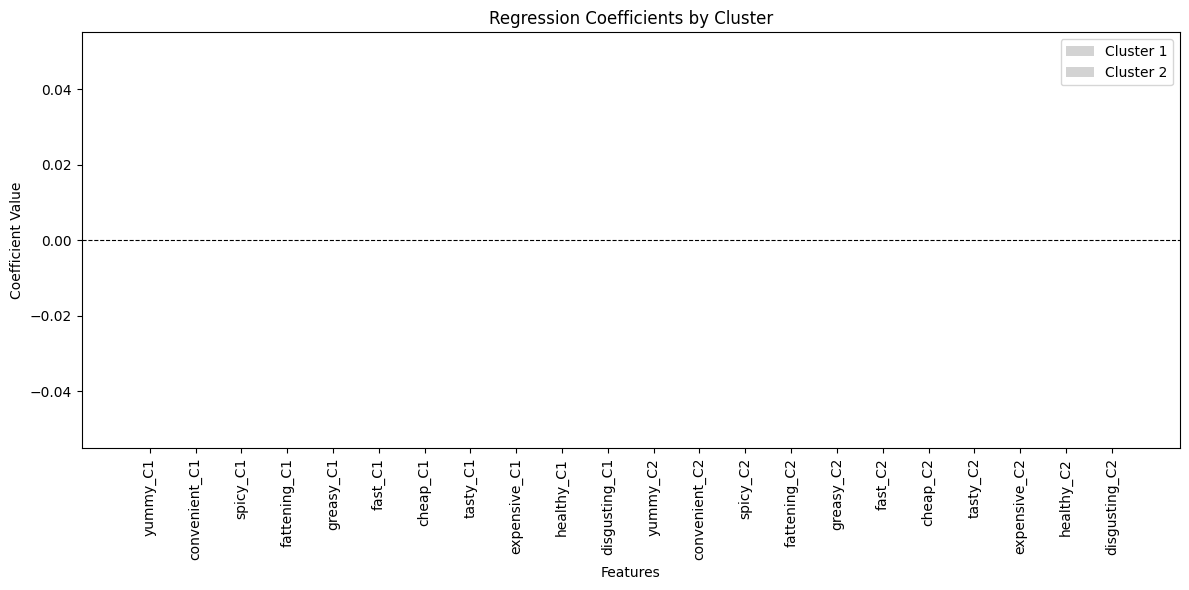

In [136]:

# Assuming `refitted_summaries` is a list of regression summaries from previous step

# Function to calculate significance of coefficientsdef calculate_pvalues(X, y, model):
# Function to calculate significance of coefficients
def calculate_pvalues(X, y, model):
    # Get predictions
    predictions = model.predict(X)
    # Residuals and standard error
    residuals = y - predictions
    mse = np.mean(residuals**2)
    n, k = X.shape  # number of samples and predictors
    se = np.sqrt(mse * np.linalg.inv(X.T @ X).diagonal())  # standard error
    t_stats = np.zeros_like(model.coef_)  # Initialize t_stats
    for i in range(len(se)):
        if se[i] != 0:  # Check if standard error is not zero
            t_stats[i] = model.coef_[i] / se[i]
        else:
            t_stats[i] = np.nan  # Set t-statistic to NaN if se is zero

    p_values = [2 * (1 - t.cdf(np.abs(t_stat), df=n-k-1)) if not np.isnan(t_stat) else np.nan for t_stat in t_stats]  # two-tailed p-values
    return p_values
# Prepare a DataFrame to store coefficients and their significance
coef_summary = []

# Assuming 'original_mcdonalds' is your original DataFrame (with 'Like.n' column):
original_mcdonalds = pd.read_csv('/content/sample_data/mcdonalds.csv')  # Read the original data
like_mapping = {'Love it': 1, 'Like it': 2, 'Neutral': 3, 'Dislike it': 4, 'Hate it': 5}
original_mcdonalds['Like.n'] = original_mcdonalds['Like'].map(like_mapping)  # Create 'Like.n' column
original_mcdonalds = (original_mcdonalds == "Yes").astype(int)  # Convert 'Yes'/'No' to 1/0

# Add cluster labels to original_mcdonalds using df_plot
original_mcdonalds['Cluster'] = df_plot['Cluster']  # Assuming df_plot has your cluster labels

for cluster, summary in enumerate(refitted_summaries):
    model = refitted_models[cluster]
    # Use original_mcdonalds with the added 'Cluster' column
    X_cluster = original_mcdonalds[original_mcdonalds['Cluster'] == cluster][original_mcdonalds.columns[:11]]
    y_cluster = original_mcdonalds[original_mcdonalds['Cluster'] == cluster]['Like.n']
    p_values = calculate_pvalues(X_cluster, y_cluster, model)

    for feature, coef, p_val in zip(X_cluster.columns, model.coef_, p_values):
        coef_summary.append({
            "Cluster": cluster + 1,
            "Feature": feature,
            "Coefficient": coef,
            "p_value": p_val,
            "Significant": p_val < 0.05  # Significance threshold
        })

coef_df = pd.DataFrame(coef_summary)

# Plot coefficients for each cluster
clusters = coef_df['Cluster'].unique()
plt.figure(figsize=(12, 6))

for cluster in clusters:
    cluster_data = coef_df[coef_df['Cluster'] == cluster]
    plt.bar(
        cluster_data['Feature'] + f"_C{cluster}",
        cluster_data['Coefficient'],
        color=['darkgrey' if sig else 'lightgrey' for sig in cluster_data['Significant']],
        label=f"Cluster {cluster}"
    )

plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xticks(rotation=90)
plt.legend()
plt.title("Regression Coefficients by Cluster")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


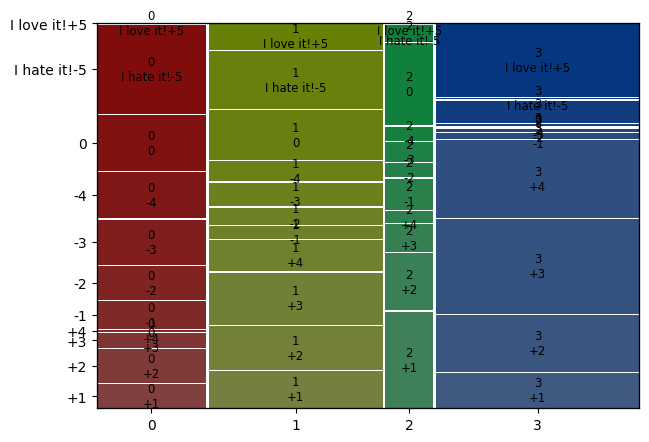

In [144]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data1 = pd.read_csv('/content/sample_data/mcdonalds.csv')

def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

df_eleven = data1.loc[:,cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])

# Get the actual column names from the crosstab DataFrame
actual_columns = crosstab.columns.tolist()

# Use the actual column names to select the desired columns for the mosaic plot
# This assumes the order of columns in crosstab matches the desired order for the plot
crosstab = crosstab[actual_columns]

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

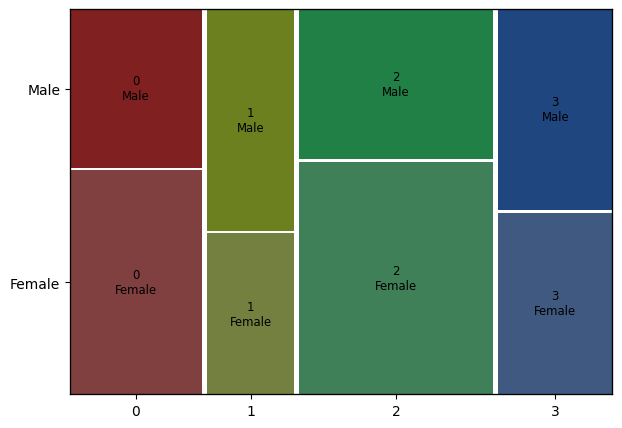

In [146]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

# Replace 'data' with 'data1' (or 'mcdonalds' depending on your desired DataFrame)
ct = pd.crosstab(k4, data1['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

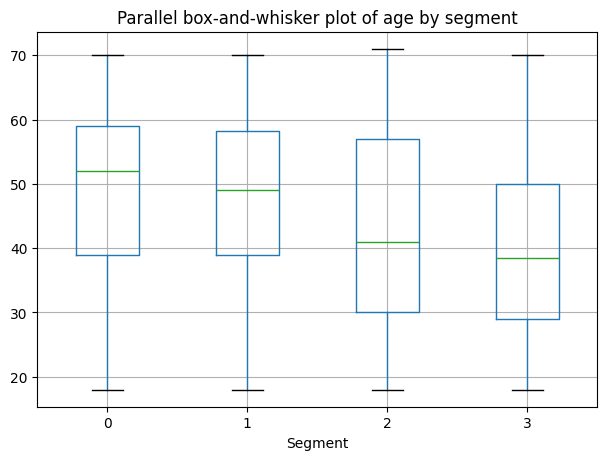

In [148]:
df = pd.DataFrame({'Segment': k4, 'Age': data1['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [149]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [150]:
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [151]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


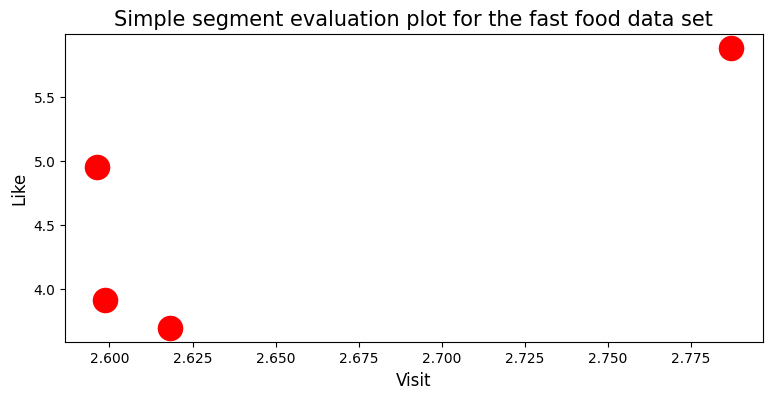

In [152]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()